In [2]:
import numpy as np

!pip install mglearn
import mglearn

    100% |████████████████████████████████| 542kB 30.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


# K-NN classifier

Given an in
1. put $X$, find the set of nearest $k$ neighbors from training samples.
1. Select the most frequent class in the neighbor set.

API: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


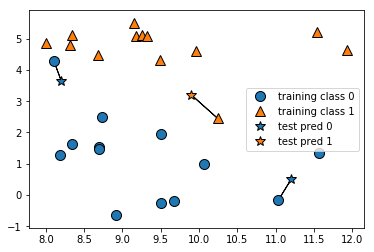

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

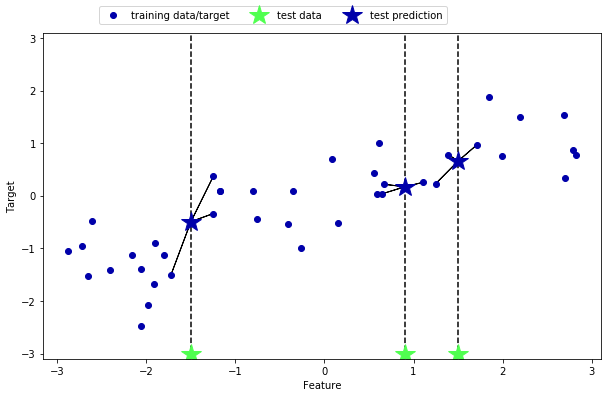

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

# Iris꽃의 품종을 맞추는 문제.


* 인식 대상 클래스: { 'setosa' 'versicolor' 'virginica' }

>  0: setosa, 1: veersicolor, 2: virginica


* 입력 Feature: Petal(꽃잎)과 Sepal(꽃받침)의 길이 및 넓이
> [ 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


* sci-kit learn의 내장 데이터 데이터

> sci-kit learn import 명령: "import sklearn as sk"

> sci-kit learn에 포함된 데이터셋에 대한 설명: https://datascienceschool.net/view-notebook/293ece8b0d124fbaa4d4d52bb8f1cb42/

- 데이터 포맷: Bunch class
>- data: (필수) 독립 변수 ndarray 배열
>- target: (필수) 종속 변수 ndarray 배열
>- feature_names: (옵션) 독립 변수 이름 리스트
>- target_names: (옵션) 종속 변수 이름 리스트
>- DESCR: (옵션) 자료에 대한 설명

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("keys = {}".format(iris_dataset.keys()))

keys = dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("iris_dataset.shape = {}".format(iris_dataset.data.shape))
print("iris_dataset.data ({0}) = \n{1}".format(iris_dataset.data.shape, iris_dataset.data[:10]))

iris_dataset.shape = (150, 4)
iris_dataset.data ((150, 4)) = 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [0]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:

print("iris_dataset.target ({} dim) = \n{}".format(len(iris_dataset.target), iris_dataset.target))

iris_dataset.target (150 dim) = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Data Visualization

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train contains {} samples, X_test contains {} samples".format(len(X_train), len(X_test)))

X_train contains 112 samples, X_test contains 38 samples


In [0]:
print("X_train = \n{}".format(X_train[:10]))
print("y_train = \n{}".format(y_train[:10]))

X_train = 
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]]
y_train = 
[1 1 2 0 2 0 0 1 2 2]


In [0]:
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [0]:
print("iris dataset feature name {}".format(iris_dataset.feature_names))

iris dataset feature name ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
    marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

NameError: ignored

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [0]:
prediction = knn.predict(X_new)
print("prediction = {} ({})".format(prediction.squeeze(), iris_dataset.target_names[prediction].squeeze()))

prediction = 0 (setosa)


In [0]:
y_pred = knn.predict(X_test)
print("predictions = {}".format(y_pred))

predictions = [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [0]:
score = np.mean(y_pred == y_test)
print("Accuracy = {}".format(score))

# or 
# print("Accuracy = {}".format(knn.score(X_test, y_test)))

Accuracy = 0.9736842105263158
